<a href="https://colab.research.google.com/github/veyselalevcan/Federated-Learning-and-Generative-AI/blob/main/KDD_Data_FL_Wgan_compare_result_other_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

def load_and_preprocess_kdd(filepath):
    """
    Load and preprocess KDDCup99 dataset with focus on normal/attack separation
    Returns:
        normal_df: Processed normal samples (DataFrame)
        attack_df: Processed attack samples (DataFrame)
        label_encoders: Dictionary of fitted label encoders
        scaler: Fitted MinMaxScaler
    """
    # Load data
    print("📥 Loading dataset...")
    df = pd.read_csv(filepath)

    # Basic validation
    if 'label' not in df.columns:
        raise ValueError("Dataset must contain 'label' column")

    # Create binary label: normal (0) vs attack (1)
    print("🏷 Creating binary labels...")
    df['label'] = df['label'].apply(lambda x: 0 if str(x).strip().lower() == 'normal' else 1)

    # Encode categorical features FIRST before splitting
    print("🔠 Encoding categorical features...")
    categorical_cols = ['protocol_type', 'service', 'flag']
    label_encoders = {}

    for col in categorical_cols:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])  # Fit on ALL data
            label_encoders[col] = le

    # Now separate normal and attack data
    normal_df = df[df['label'] == 0].copy()
    attack_df = df[df['label'] == 1].copy()

    # Get feature names before dropping label
    feature_names = [col for col in df.columns if col != 'label']

    # Scale numerical features
    print("⚖ Scaling features...")
    scaler = MinMaxScaler(feature_range=(-1, 1))

    # Scale features (excluding label)
    normal_df[feature_names] = scaler.fit_transform(normal_df[feature_names])
    attack_df[feature_names] = scaler.transform(attack_df[feature_names])

    # Print dataset statistics
    print("\n📊 Dataset Statistics:")
    print(f"Normal samples: {len(normal_df)}")
    print(f"Attack samples: {len(attack_df)}")
    print(f"Total features: {len(feature_names)}")

    return normal_df, attack_df, label_encoders, scaler

# Example usage
if __name__ == "__main__":
    try:
        # Adjust filepath as needed
        normal_df, attack_df, label_encoders, scaler = load_and_preprocess_kdd('/content/KDDCup99.csv')

        # Save processed data as CSV
        normal_df.to_csv('kdd_processed_normal_data.csv', index=False, float_format="%.6f")
        attack_df.to_csv('kdd_processed_attack_data.csv', index=False, float_format="%.6f")

        print("\n✅ Preprocessing complete! Saved:")
        print("- processed_normal_data.csv")
        print("- processed_attack_data.csv")

        # Print sample of normal data
        print("\nSample of normal data:")
        print(normal_df.head(3))

        # Print sample of attack data
        print("\nSample of attack data:")
        print(attack_df.head(3))

    except Exception as e:
        print(f"\n❌ Error during preprocessing: {str(e)}")
        print("Possible solutions:")
        print("1. Check if the file path is correct")
        print("2. Verify your dataset contains all required columns")
        print("3. Ensure the 'label' column contains 'normal' values")

📥 Loading dataset...
🏷 Creating binary labels...
🔠 Encoding categorical features...
⚖ Scaling features...

📊 Dataset Statistics:
Normal samples: 60720
Attack samples: 51503
Total features: 41

✅ Preprocessing complete! Saved:
- processed_normal_data.csv
- processed_attack_data.csv

Sample of normal data:
   duration  protocol_type   service  flag  src_bytes  dst_bytes  land  \
0      -1.0            0.0 -0.241379   1.0  -0.999835  -0.997217  -1.0   
1      -1.0            0.0 -0.241379   1.0  -0.999782  -0.999752  -1.0   
2      -1.0            0.0 -0.241379   1.0  -0.999786  -0.999317  -1.0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0            -1.0    -1.0 -1.0  ...           -0.929412   
1            -1.0    -1.0 -1.0  ...           -0.850980   
2            -1.0    -1.0 -1.0  ...           -0.772549   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                    -1.0   
1                     1.0                    -1.0   
2

Loading and verifying preprocessed normal data...

Training on 60720 samples with 41 features

Building WGAN models...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(



Generator test output (should not contain NaN):
[[ 0.00158334 -0.00025852 -0.00172593  0.00226234  0.00223928  0.00480962
  -0.00052223 -0.00200781  0.00035378  0.00086517 -0.00351589  0.00082654
   0.00209961 -0.0015395   0.00219872  0.00178159 -0.00125881 -0.00331095
   0.00052726  0.00162294  0.00126308 -0.00149168 -0.00439579 -0.00290239
  -0.00343614 -0.00045921 -0.00271524  0.00305249  0.00116199 -0.00176602
   0.00376446  0.00389569 -0.00083186 -0.00011303 -0.00227631  0.00146648
   0.00056957  0.00126033 -0.00014099  0.00287732 -0.00111727]]

Training WGAN-GP...

Data range check (should be between -1 and 1):
Min: -1.0, Max: 1.0
Epoch 0: D loss = 8.6927, G loss = -0.0018, GP = 0.8625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


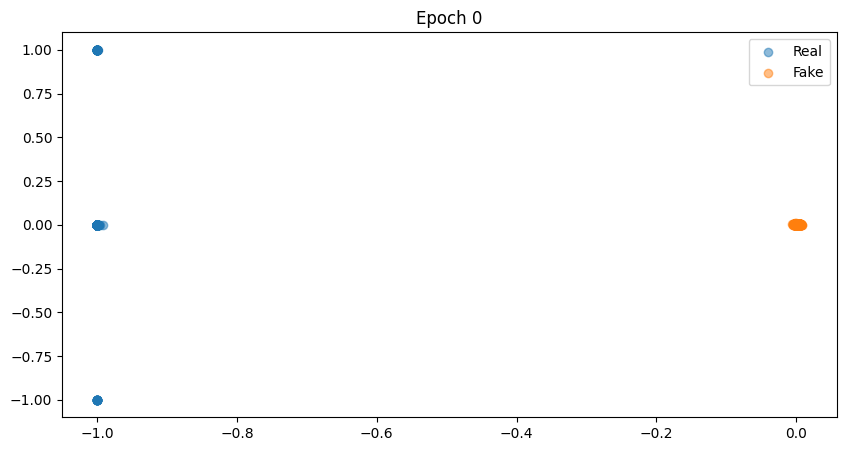

Epoch 100: D loss = -2.6791, G loss = -3.1237, GP = 0.0153
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


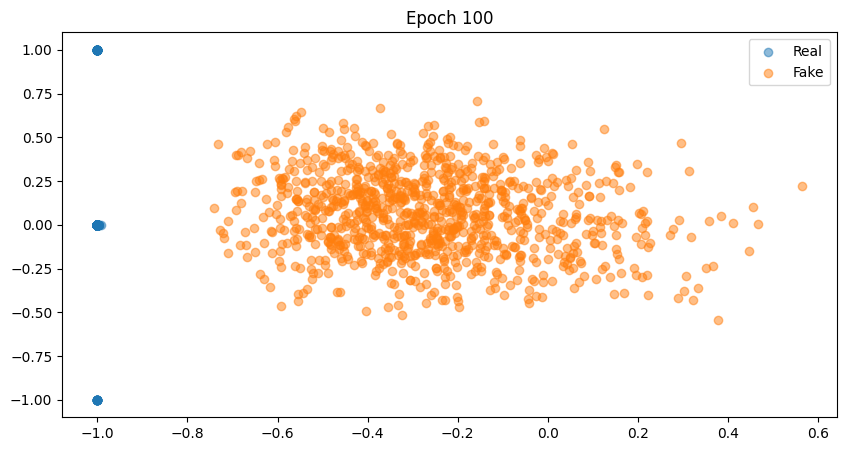

Epoch 200: D loss = -0.7600, G loss = -4.4237, GP = 0.0010
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


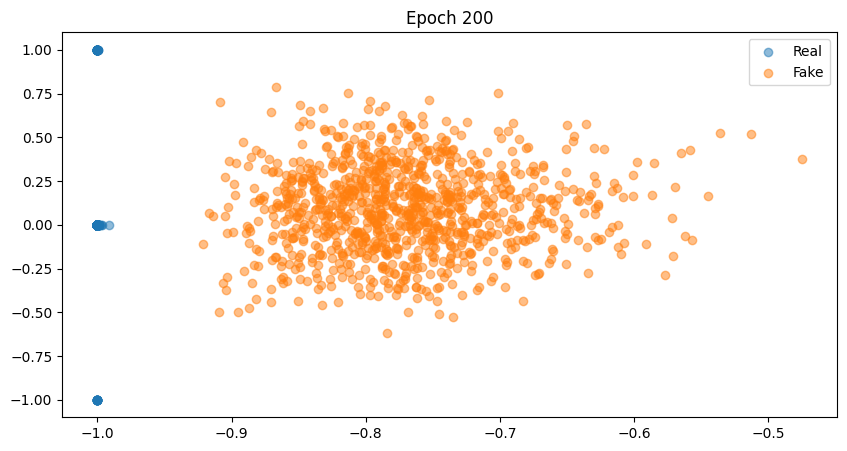

Epoch 300: D loss = -0.1462, G loss = -4.1447, GP = 0.0005
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


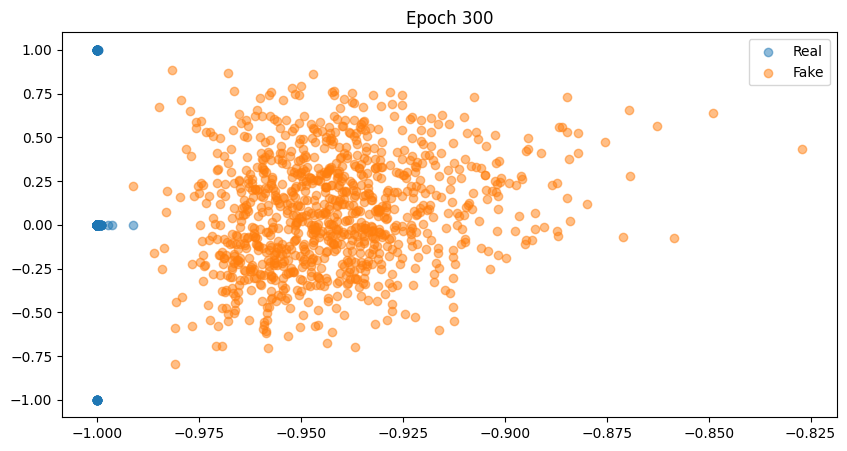

Epoch 400: D loss = -0.1938, G loss = -3.8212, GP = 0.0010
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


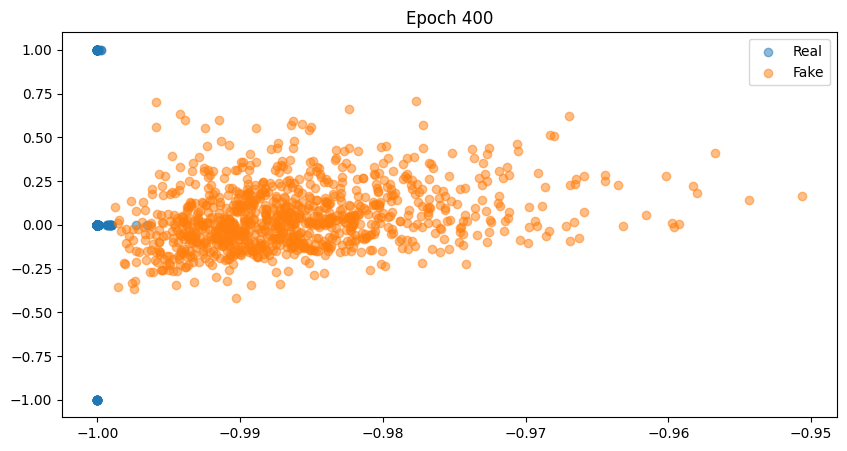

Epoch 500: D loss = -0.1306, G loss = -4.1901, GP = 0.0017
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


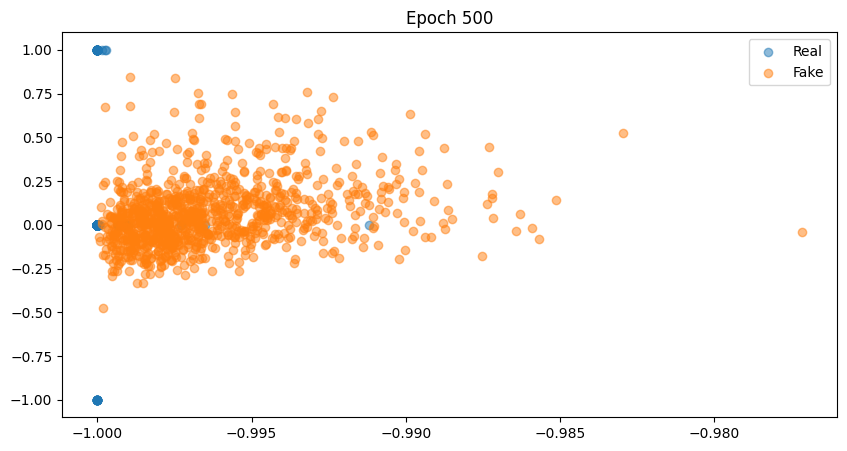

Epoch 600: D loss = 0.0727, G loss = -3.8856, GP = 0.0023
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


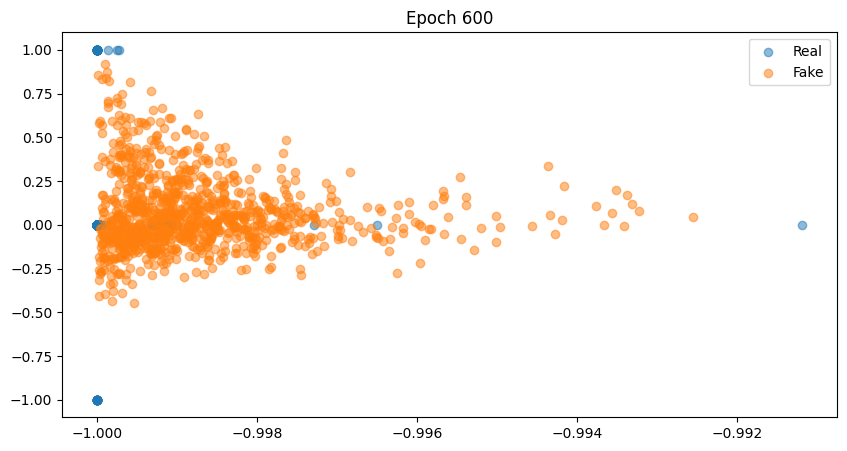

Epoch 700: D loss = -0.1657, G loss = -3.7290, GP = 0.0030
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


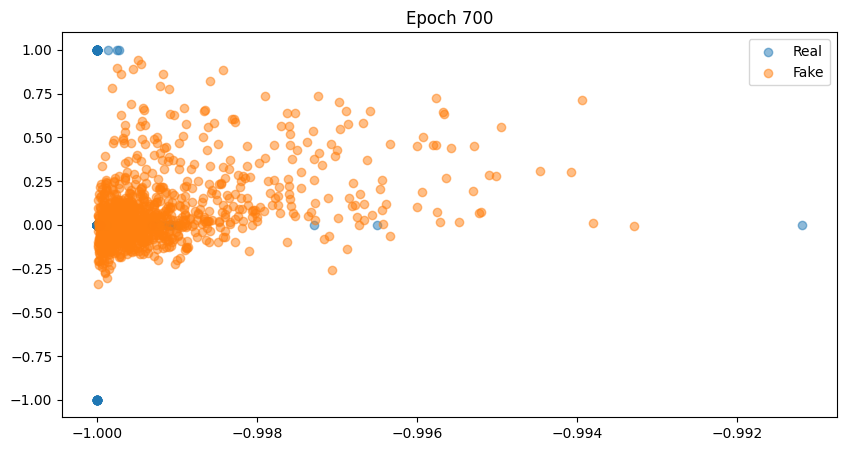

Epoch 800: D loss = -0.2279, G loss = -3.8312, GP = 0.0027
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


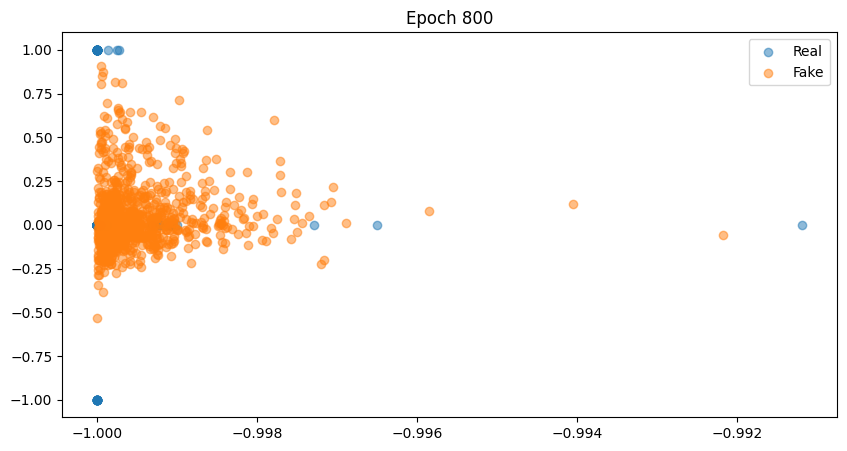

Epoch 900: D loss = 0.0889, G loss = -3.5914, GP = 0.0033
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


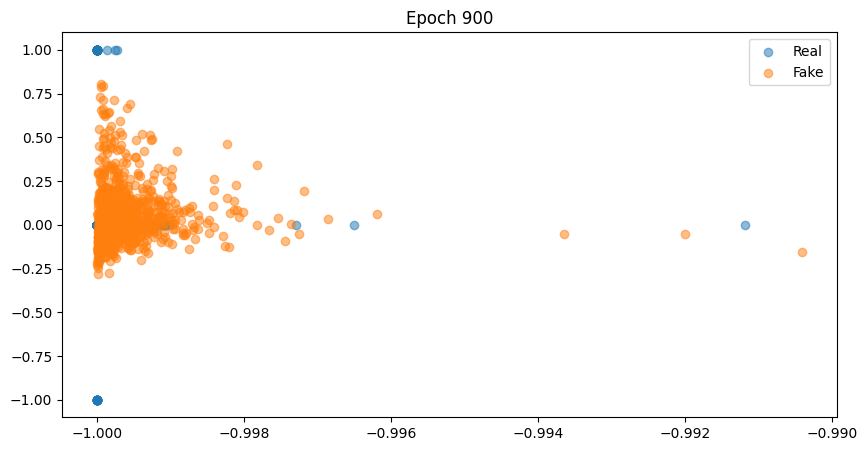

Epoch 999: D loss = -0.0774, G loss = -3.1753, GP = 0.0038
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


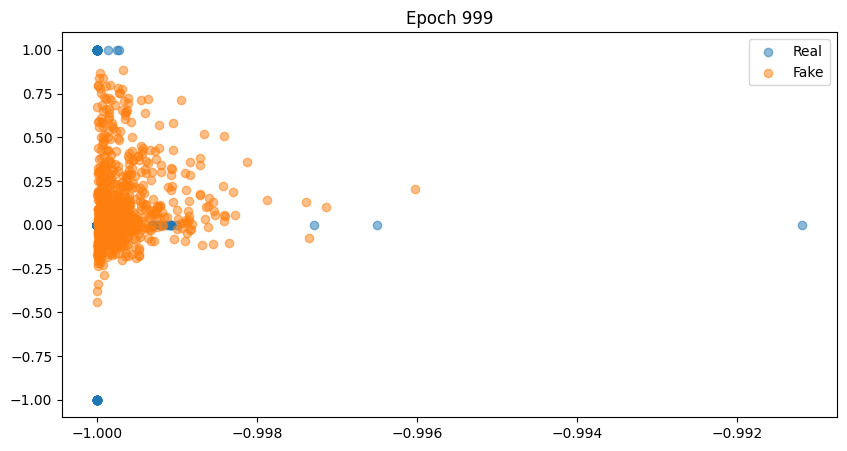

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step



✅ Training successful - saved models:
- kdd_wgan_generator.h5
- kdd_wgan_discriminator.h5


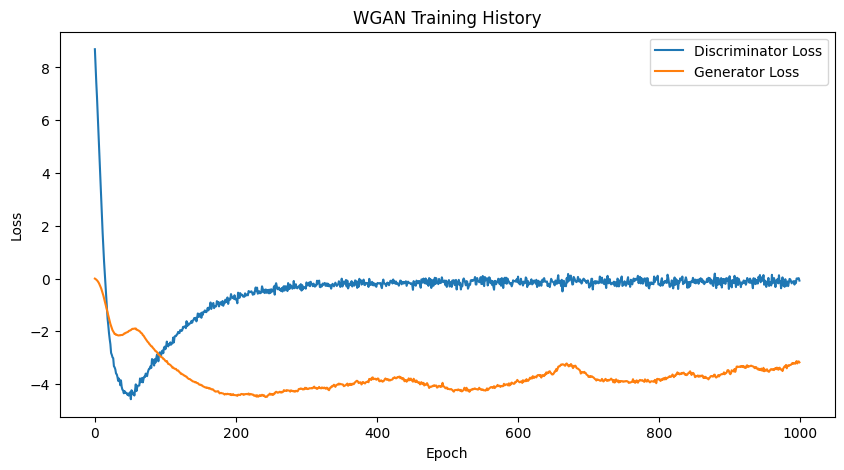

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# ==================== IMPROVED WGAN Model Definition ====================
def build_generator(latent_dim, output_dim):
    """Build WGAN generator network with better stability"""
    init = initializers.RandomNormal(mean=0.0, stddev=0.02)

    model = models.Sequential([
        layers.Input(shape=(latent_dim,)),
        layers.Dense(128, kernel_initializer=init),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),

        layers.Dense(256, kernel_initializer=init),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),

        layers.Dense(512, kernel_initializer=init),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),

        layers.Dense(output_dim, activation='tanh', kernel_initializer=init)
    ])
    return model

def build_discriminator(input_dim):
    """Build WGAN critic network with improved stability"""
    init = initializers.RandomNormal(mean=0.0, stddev=0.02)

    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(512, kernel_initializer=init),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),

        layers.Dense(256, kernel_initializer=init),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),

        layers.Dense(1)  # Linear output for Wasserstein distance
    ])
    return model

def compute_gradient_penalty(real_samples, fake_samples, discriminator, batch_size):
    """Improved gradient penalty calculation"""
    # Random weight term for interpolation
    alpha = tf.random.uniform(shape=[batch_size, 1], minval=0., maxval=1.)

    # Difference between real and fake samples
    differences = fake_samples - real_samples
    interpolates = real_samples + (alpha * differences)

    with tf.GradientTape() as tape:
        tape.watch(interpolates)
        pred = discriminator(interpolates)

    # Calculate gradients with respect to inputs
    gradients = tape.gradient(pred, [interpolates])[0]

    # Calculate L2 norm
    slopes = tf.sqrt(tf.reduce_sum(tf.square(gradients), axis=[1]))
    gradient_penalty = tf.reduce_mean((slopes - 1.)**2)

    return gradient_penalty

# ==================== IMPROVED Training Function ====================
def train_wgan(generator, discriminator, data, latent_dim=100,
               epochs=1000, batch_size=64, n_critic=5, gp_weight=10):
    """Train WGAN-GP model with stability improvements"""

    # Optimizers with lower learning rates
    opt_g = tf.keras.optimizers.RMSprop(5e-5)
    opt_d = tf.keras.optimizers.RMSprop(5e-5)

    # Training history
    history = {'d_loss': [], 'g_loss': []}

    # Data scaling check
    print("\nData range check (should be between -1 and 1):")
    print(f"Min: {np.min(data)}, Max: {np.max(data)}")

    # Convert data to float32 if not already
    data = data.astype('float32')

    for epoch in range(epochs):
        # Train discriminator (critic) more frequently
        for _ in range(n_critic):
            # Select random real samples
            idx = np.random.randint(0, data.shape[0], batch_size)
            real_samples = data[idx]

            # Generate fake samples with gradient tracking
            noise = tf.random.normal([batch_size, latent_dim])
            with tf.GradientTape() as gen_tape:
                fake_samples = generator(noise, training=True)

            # Train discriminator
            with tf.GradientTape() as disc_tape:
                real_output = discriminator(real_samples, training=True)
                fake_output = discriminator(fake_samples, training=True)

                # WGAN loss
                d_loss = tf.reduce_mean(fake_output) - tf.reduce_mean(real_output)

                # Gradient penalty
                gp = compute_gradient_penalty(real_samples, fake_samples, discriminator, batch_size)
                d_loss += gp_weight * gp

            # Check for NaN in discriminator loss
            if tf.math.is_nan(d_loss):
                print("NaN detected in discriminator loss!")
                return generator, discriminator, history

            # Apply discriminator gradients
            d_gradients = disc_tape.gradient(d_loss, discriminator.trainable_variables)
            opt_d.apply_gradients(zip(d_gradients, discriminator.trainable_variables))

        # Train generator
        noise = tf.random.normal([batch_size, latent_dim])
        with tf.GradientTape() as gen_tape:
            fake_samples = generator(noise, training=True)
            fake_output = discriminator(fake_samples, training=False)
            g_loss = -tf.reduce_mean(fake_output)

        # Check for NaN in generator loss
        if tf.math.is_nan(g_loss):
            print("NaN detected in generator loss!")
            return generator, discriminator, history

        # Apply generator gradients
        g_gradients = gen_tape.gradient(g_loss, generator.trainable_variables)
        opt_g.apply_gradients(zip(g_gradients, generator.trainable_variables))

        # Save losses
        history['d_loss'].append(float(d_loss))
        history['g_loss'].append(float(g_loss))

        # Progress monitoring
        if epoch % 100 == 0 or epoch == epochs-1:
            print(f"Epoch {epoch}: D loss = {d_loss:.4f}, G loss = {g_loss:.4f}, GP = {gp:.4f}")

            # Test generation
            test_samples = generator.predict(tf.random.normal([1, latent_dim]))
            if np.any(np.isnan(test_samples)):
                print("⚠️ NaN detected in generated samples!")
                return generator, discriminator, history

            # Visualize sample generations if possible
            if data.shape[1] >= 2:
                plt.figure(figsize=(10,5))
                samples = generator.predict(tf.random.normal([1000, latent_dim]))

                plt.scatter(data[:1000, 0], data[:1000, 1], alpha=0.5, label='Real')
                plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, label='Fake')
                plt.title(f"Epoch {epoch}")
                plt.legend()
                plt.show()

    return generator, discriminator, history

# ==================== MAIN EXECUTION WITH CHECKS ====================
if __name__ == "__main__":
    # Load and verify data
    print("Loading and verifying preprocessed normal data...")
    #normal_df = pd.read_csv('/content/kdd_processed_normal_data.csv')

    # Verify no NaN in input data
    if normal_df.isnull().any().any():
        print("Error: Input data contains NaN values!")
        # Handle missing data - either drop or impute
        normal_df = normal_df.dropna()
        print("Dropped rows with NaN values")

    # Extract features (excluding label)
    normal_data = normal_df.drop('label', axis=1).values

    # Scale data to [-1, 1] range if not already
    if np.max(normal_data) > 1 or np.min(normal_data) < -1:
        scaler = MinMaxScaler(feature_range=(-1, 1))
        normal_data = scaler.fit_transform(normal_data)
        print("Data scaled to [-1, 1] range")

    print(f"\nTraining on {len(normal_data)} samples with {normal_data.shape[1]} features")

    # WGAN parameters
    latent_dim = 100
    input_dim = normal_data.shape[1]

    # Build models
    print("\nBuilding WGAN models...")
    generator = build_generator(latent_dim, input_dim)
    discriminator = build_discriminator(input_dim)

    # Verify model initialization
    test_noise = tf.random.normal([1, latent_dim])
    test_output = generator(test_noise)
    print("\nGenerator test output (should not contain NaN):")
    print(test_output.numpy())

    if np.any(np.isnan(test_output.numpy())):
        print("⚠️ Generator produces NaN from initialization!")
        print("Reinitializing with different random seed...")
        tf.keras.backend.clear_session()
        generator = build_generator(latent_dim, input_dim)
        test_output = generator(test_noise)
        if np.any(np.isnan(test_output.numpy())):
            raise ValueError("Generator still produces NaN - check architecture")

    # Train WGAN
    print("\nTraining WGAN-GP...")
    generator, discriminator, history = train_wgan(
        generator,
        discriminator,
        normal_data,
        latent_dim=latent_dim,
        epochs=1000,
        batch_size=64
    )

    # Final test of generation
    test_samples = generator.predict(tf.random.normal([10, latent_dim]))
    if np.any(np.isnan(test_samples)):
        print("\n❌ Training failed - generator still produces NaN values")
        print("Possible solutions:")
        print("1. Reduce learning rate further")
        print("2. Increase gradient penalty weight")
        print("3. Simplify model architecture")
    else:
        # Save models
        generator.save('kdd_wgan_generator.h5')
        discriminator.save('kdd_wgan_discriminator.h5')
        print("\n✅ Training successful - saved models:")
        print("- kdd_wgan_generator.h5")
        print("- kdd_wgan_discriminator.h5")

        # Plot training history
        plt.figure(figsize=(10,5))
        plt.plot(history['d_loss'], label='Discriminator Loss')
        plt.plot(history['g_loss'], label='Generator Loss')
        plt.title("WGAN Training History")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

In [2]:
from tensorflow.keras.models import load_model

# Load the uploaded model

loaded_model_generator = load_model('/content/kdd_wgan_generator.h5')
loaded_model_discriminator = load_model('/content/kdd_wgan_discriminator.h5')

# Now you can use the loaded models for inference or further training

# Display the model summary to check its structure and layers
loaded_model_generator.summary()
loaded_model_discriminator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 41)             │        21,033 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,569 (775.66 KB)

 Trainable params: 198,569 (775.66 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │        21,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153,089 (598.00 KB)

 Trainable params: 153,089 (598.00 KB)

 Non-trainable params: 0 (0.00 B)

🔮 Generating 60720 synthetic samples...
1898/1898 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
📊 Comparing data distributions...


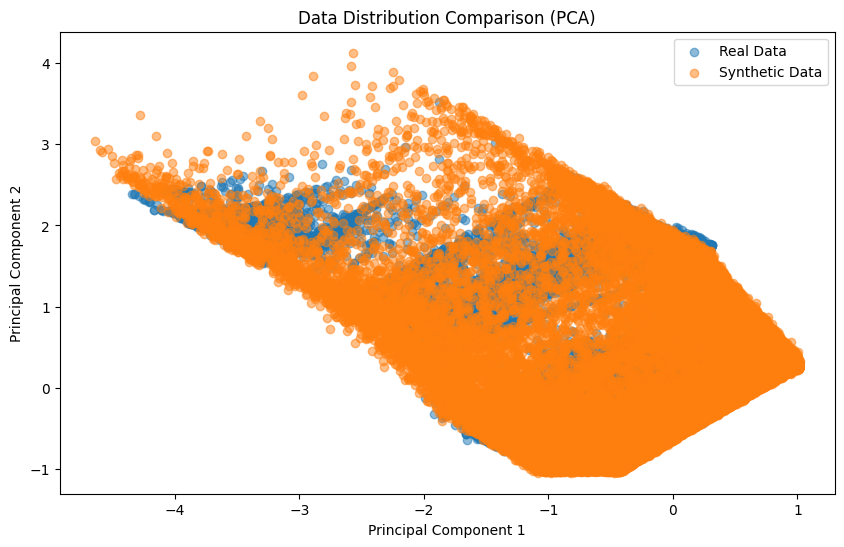


📐 Real Data Statistics:
      duration  protocol_type   service      flag  src_bytes  dst_bytes  land  \
mean -0.999751       0.057049 -0.186258  0.947398  -0.999094  -0.997907  -1.0   
std   0.011823       0.262389  0.296891  0.299145   0.027343   0.017296   0.0   
min  -1.000000      -1.000000 -1.000000 -1.000000  -1.000000  -1.000000  -1.0   
max   1.000000       1.000000  1.000000  1.000000   1.000000   1.000000  -1.0   

      wrong_fragment    urgent       hot  ...  dst_host_count  \
mean            -1.0 -0.999967 -0.997083  ...        0.055115   
std              0.0  0.008116  0.056698  ...        0.802935   
min             -1.0 -1.000000 -1.000000  ...       -1.000000   
max             -1.0  1.000000  1.000000  ...        1.000000   

      dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
mean            0.756630                0.852043               -0.978136   
std             0.524941                0.401573                0.098058   
min            

In [9]:
# GENERATE SYNTHETIC DATA

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# --------------------------
# STEP 1: DATA PREPARATION
# --------------------------
# (Run this in Colab before the functions)
# normal_df = pd.read_csv('/content/kdd_processed_normal_data.csv')
# OR if already loaded in memory:
# normal_df = your_loaded_normal_data

# --------------------------
# STEP 2: LOAD GENERATOR MODEL
# --------------------------
def load_generator_model(model_path):
    """Load the trained WGAN generator"""
    print(f"⚙️ Loading generator model from {model_path}...")
    try:
        generator = load_model(model_path)
        print(f"✅ Generator loaded. Input shape: {generator.input_shape}")
        return generator
    except Exception as e:
        print(f"❌ Error loading generator: {str(e)}")
        return None


#generator = load_generator_model('/content/kdd_wgan_generator.h5')

# --------------------------
# STEP 3: GENERATE SYNTHETIC DATA
# --------------------------
def generate_synthetic_samples(generator, normal_df, num_samples=None):
    """Generate synthetic data samples"""
    if generator is None:
        print("⚠️ No generator available. Please load model first.")
        return None

    feature_names = [col for col in normal_df.columns if col != 'label']
    latent_dim = generator.input_shape[1]

    # Use original data size if not specified
    if num_samples is None:
        num_samples = len(normal_df)

    print(f"🔮 Generating {num_samples} synthetic samples...")

    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    synthetic_data = generator.predict(noise, verbose=1)

    synthetic_df = pd.DataFrame(synthetic_data, columns=feature_names)
    synthetic_df['label'] = 0  # Mark as normal

    # Check for NaN values
    nan_count = synthetic_df.isna().sum().sum()
    if nan_count > 0:
        print(f"⚠️ Warning: Generated {nan_count} NaN values. Applying imputation...")
        imputer = SimpleImputer(strategy='mean')
        synthetic_df[feature_names] = imputer.fit_transform(synthetic_df[feature_names])

    return synthetic_df

# Example usage:
synthetic_df = generate_synthetic_samples(generator, normal_df)

# --------------------------
# STEP 4: VISUALIZE RESULTS
# --------------------------
def compare_data_distributions(real_df, synthetic_df):
    """Compare real and synthetic data distributions"""
    if real_df is None or synthetic_df is None:
        print("⚠️ Missing data for comparison")
        return

    feature_names = [col for col in real_df.columns if col != 'label']
    real_data = real_df[feature_names].values
    synthetic_data = synthetic_df[feature_names].values

    print("📊 Comparing data distributions...")

    # Handle NaN values if any exist
    if np.isnan(real_data).any() or np.isnan(synthetic_data).any():
        print("⚠️ NaN values detected. Applying imputation...")
        imputer = SimpleImputer(strategy='mean')
        real_data = imputer.fit_transform(real_data)
        synthetic_data = imputer.transform(synthetic_data)

    # Apply PCA for visualization
    pca = PCA(n_components=2)
    combined = np.vstack([real_data, synthetic_data])
    pca_result = pca.fit_transform(combined)

    # Split results
    real_pca = pca_result[:len(real_data)]
    synth_pca = pca_result[len(real_data):]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(real_pca[:, 0], real_pca[:, 1], alpha=0.5, label='Real Data')
    plt.scatter(synth_pca[:, 0], synth_pca[:, 1], alpha=0.5, label='Synthetic Data')
    plt.title("Data Distribution Comparison (PCA)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.show()

    # Print statistics
    print("\n📐 Real Data Statistics:")
    print(real_df[feature_names].describe().loc[['mean', 'std', 'min', 'max']])

    print("\n📐 Synthetic Data Statistics:")
    print(synthetic_df[feature_names].describe().loc[['mean', 'std', 'min', 'max']])

# Example usage:
compare_data_distributions(normal_df, synthetic_df)

# --------------------------
# STEP 5: SAVE RESULTS
# --------------------------
def save_synthetic_data(synthetic_df, file_path='kdd_synthetic_normal_data.csv'):
    """Save generated synthetic data to CSV"""
    if synthetic_df is None:
        print("⚠️ No synthetic data to save")
        return

    try:
        synthetic_df.to_csv(file_path, index=False, float_format="%.6f")
        print(f"✅ Saved synthetic data to {file_path}")
        print("\nSample data:")
        print(synthetic_df.head(3))
    except Exception as e:
        print(f"❌ Error saving data: {str(e)}")

# Example usage:
save_synthetic_data(synthetic_df)

In [10]:
# Federated Learning with SVM only (AE removed)

import numpy as np
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, roc_auc_score

# Extract features
feature_names = [col for col in normal_df.columns if col != 'label']
normal_data = normal_df[feature_names].values
attack_data = attack_df[feature_names].values
synthetic_data = synthetic_df[feature_names].values if 'synthetic_df' in globals() else None

class FLClient:
    def __init__(self, client_id, data, labels):
        self.client_id = client_id
        self.data = data
        self.labels = labels
        self.svm = None

    def train_svm(self):
        self.svm = OneClassSVM(kernel='rbf', nu=0.05, gamma='auto')
        self.svm.fit(self.data)

    def predict(self, X):
        return (self.svm.predict(X) == -1).astype(int)  # Attack: 1, Normal: 0

def create_fl_clients(normal_data, attack_data, synthetic_data=None, num_clients=3):
    clients = []
    test_size = len(attack_data) // 5
    X_test = np.vstack([normal_data[:test_size], attack_data[:test_size]])
    y_test = np.concatenate([np.zeros(test_size), np.ones(test_size)])

    scenarios = [
        ("Real Only", normal_data),
        ("Real + Synthetic", np.vstack([normal_data, synthetic_data]) if synthetic_data is not None else normal_data),
        ("Synthetic Only", synthetic_data) if synthetic_data is not None else ("Real Only", normal_data)
    ][:num_clients]

    for i, (name, data) in enumerate(scenarios):
        if data is not None:
            client = FLClient(f"Client {i+1} ({name})", data, np.zeros(len(data)))
            clients.append(client)
            print(f"Created {client.client_id} with {len(data)} samples")

    return clients, X_test, y_test

def evaluate_svm(client, X_test, y_test):
    y_pred = client.predict(X_test)
    print(f"\n\ud83d\udcca SVM Evaluation ({client.client_id}):")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    return y_pred

def evaluate_all_clients(clients, X_test, y_test):
    print("\n\ud83d\udd0d Client Evaluations (SVM only):")
    for client in clients:
        client.train_svm()
        evaluate_svm(client, X_test, y_test)

def federated_soft_voting(clients, X_test, y_test):
    print("\n\ud83c\udf0d Federated Soft Voting Evaluation:")
    all_preds = np.array([client.predict(X_test) for client in clients])
    avg_preds = np.mean(all_preds, axis=0)
    y_pred = (avg_preds >= 0.5).astype(int)
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    return y_pred

def run_fl_pipeline(normal_data, attack_data, synthetic_data=None, num_clients=3):
    print("\ud83d\ude80 Starting SVM-based Federated Learning Pipeline")
    clients, X_test, y_test = create_fl_clients(normal_data, attack_data, synthetic_data, num_clients)
    evaluate_all_clients(clients, X_test, y_test)
    federated_soft_voting(clients, X_test, y_test)
    return clients

# Execute pipeline
clients = run_fl_pipeline(
    normal_data=normal_data,
    attack_data=attack_data,
    synthetic_data=synthetic_data,
    num_clients=3
)


ERROR:tornado.application:Exception in callback functools.partial(<bound method OutStream._flush of <ipykernel.iostream.OutStream object at 0x7ef5fbfcffa0>>)
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 750, in _run_callback
    ret = callback()
          ^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/iostream.py", line 518, in _flush
    self.session.send(
  File "/usr/local/lib/python3.11/dist-packages/jupyter_client/session.py", line 742, in send
    to_send = self.serialize(msg, ident)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/jupyter_client/session.py", line 630, in serialize
    content = self.pack(content)
              ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/jupyter_client/session.py", line 82, in <lambda>
    json_packer = lambda obj: jsonapi.dumps(obj, default=date_default,
                              ^^^^^^^^^^^^^^^^

              precision    recall  f1-score   support

      Normal       0.91      0.97      0.94     10300
      Attack       0.97      0.90      0.94     10300

    accuracy                           0.94     20600
   macro avg       0.94      0.94      0.94     20600
weighted avg       0.94      0.94      0.94     20600

ROC-AUC: 0.9380582524271845


In [17]:
import pickle
from datetime import datetime

# Create a global model by combining all client models (you can modify this aggregation logic)
global_model = OneClassSVM(kernel='rbf', nu=0.05, gamma='auto')
# Here we're just taking the first client's model as the global model for simplicity
# In a real FL scenario, you would aggregate the models properly
global_model = clients[0].svm

# Save the global model
model_filename = 'kdd_fl_svm_global_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(global_model, f)
print(f"\nGlobal model saved as {model_filename}")


Global model saved as kdd_fl_svm_global_model.pkl


Created Client 1 (Real Only) with 60720 samples
Created Client 2 (Real + Synthetic) with 60720 samples
Created Client 3 (Real Only) with 60720 samples


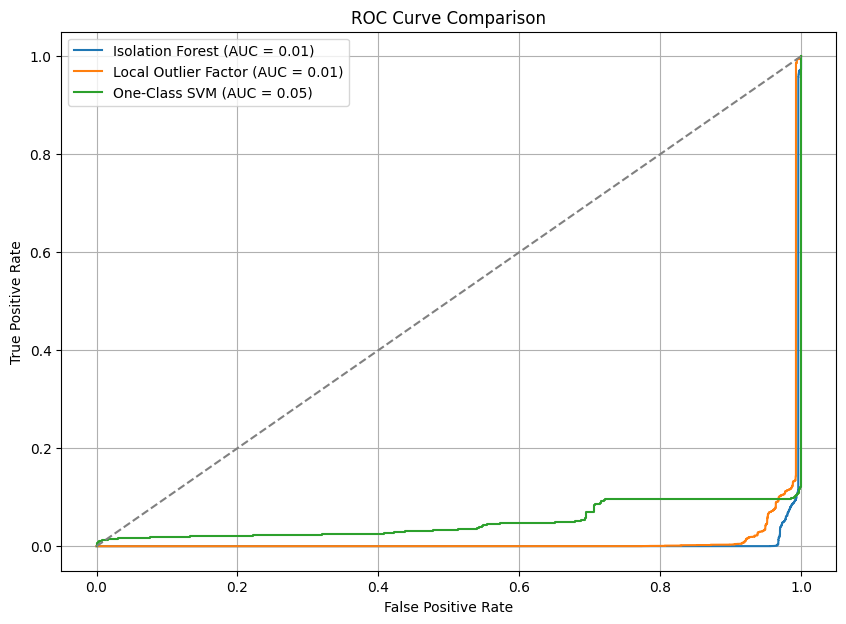


📊 Traditional Unsupervised Model Performance:
                  Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
2         One-Class SVM    0.9402     0.9758  0.9029    0.9379   0.0493
1  Local Outlier Factor    0.9548     0.9259  0.9887    0.9563   0.0124
0      Isolation Forest    0.9813     0.9647  0.9992    0.9816   0.0058


In [13]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt

# Re-create X_test and y_test by calling create_fl_clients
# Assuming normal_data and attack_data are available from previous cells
clients, X_test, y_test = create_fl_clients(normal_data, attack_data, synthetic_data=None, num_clients=3)

def compare_unsupervised_models(X_train, X_test, y_test):
    results = []
    models = {
        'Isolation Forest': IsolationForest(contamination=0.1, random_state=42),
        'Local Outlier Factor': LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1),
        'One-Class SVM': OneClassSVM(kernel='rbf', gamma='auto', nu=0.05),
    }

    plt.figure(figsize=(10, 7))

    for name, model in models.items():
        model.fit(X_train)

        # Predict
        y_pred = model.predict(X_test)
        y_scores = model.decision_function(X_test) if hasattr(model, "decision_function") else -model._decision_function(X_test)

        # Map predictions to 0/1
        y_pred = (y_pred == -1).astype(int)  # 1: attack, 0: normal

        # Metrics
        auc = roc_auc_score(y_test, y_scores)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results.append({
            'Model': name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1 Score': f1,
            'ROC-AUC': auc
        })

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title('ROC Curve Comparison')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Display metrics table
    df_results = pd.DataFrame(results)
    print("\n📊 Traditional Unsupervised Model Performance:")
    print(df_results.sort_values(by='ROC-AUC', ascending=False).round(4))

compare_unsupervised_models(
    X_train=normal_data,     # Normal verilerle eğitilir
    X_test=X_test,           # Test seti: normal + attack
    y_test=y_test            # 0: normal, 1: attack
)

In [25]:
# FL TRAINING WITH AE AND SVM DO NOT USE IT PLS!!!!
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you've already loaded these in previous cells
# normal_df = pd.read_csv(...)
# attack_df = pd.read_csv(...)
# synthetic_df = pd.read_csv(...)

# Extract features
feature_names = [col for col in normal_df.columns if col != 'label']
normal_data = normal_df[feature_names].values
attack_data = attack_df[feature_names].values
synthetic_data = synthetic_df[feature_names].values if 'synthetic_df' in globals() else None

class FLClient:
    def __init__(self, client_id, data, labels):
        self.client_id = client_id
        self.data = data
        self.labels = labels
        self.model = self._build_ae_model(data.shape[1])
        self.svm = None  # SVM model will be trained later

    def _build_ae_model(self, input_dim):
        """Autoencoder for anomaly detection"""
        model = models.Sequential([
            layers.Dense(64, activation='relu', input_shape=(input_dim,)),
            layers.Dense(32, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(input_dim)
        ])
        model.compile(optimizer='adam', loss='mse')
        return model

    def train_autoencoder(self, epochs=1):
        self.model.fit(self.data, self.data, epochs=epochs, verbose=0)

    def train_svm(self):
        self.svm = OneClassSVM(kernel='rbf', nu=0.05, gamma='auto')
        self.svm.fit(self.data)  # Train with normal data

    def get_weights(self):
        return self.model.get_weights()

    def set_weights(self, weights):
        self.model.set_weights(weights)

def create_fl_clients(normal_data, attack_data, synthetic_data=None, num_clients=3):
    """Create federated learning clients with different data scenarios"""
    clients = []

    # Create test set (20% attack + matching normal)
    test_size = len(attack_data) // 5
    X_test = np.vstack([normal_data[:test_size], attack_data[:test_size]])
    y_test = np.concatenate([np.zeros(test_size), np.ones(test_size)])

    scenarios = [
        ("Real Only", normal_data),
        ("Real + Synthetic", np.vstack([normal_data, synthetic_data]) if synthetic_data is not None else normal_data),
        ("Synthetic Only", synthetic_data) if synthetic_data is not None else ("Real Only", normal_data)
    ][:num_clients]

    for i, (name, data) in enumerate(scenarios):
        if data is not None:  # Skip if synthetic data is None
            client = FLClient(f"Client {i+1} ({name})", data, np.zeros(len(data)))
            clients.append(client)
            print(f"Created {client.client_id} with {len(data)} samples")

    return clients, X_test, y_test

def federated_training(clients, rounds=5):
    """Perform federated averaging training"""
    for round in range(rounds):
        print(f"\n🔁 Round {round+1}/{rounds}")

        # Local training
        for client in clients:
            client.train_autoencoder(epochs=1)

        # Federated averaging
        avg_weights = [
            np.mean([client.get_weights()[i] for client in clients], axis=0)
            for i in range(len(clients[0].get_weights()))
        ]

        # Update all clients
        for client in clients:
            client.set_weights(avg_weights)

    return clients[0].model  # Return global model

def evaluate_autoencoder(model, X_test, y_test, client_name="Global"):
    """Evaluate autoencoder performance"""
    reconstructions = model.predict(X_test)
    mse = np.mean(np.square(X_test - reconstructions), axis=1)
    threshold = np.percentile(mse, 95)
    y_pred = (mse > threshold).astype(int)

    print(f"\n📊 Autoencoder Evaluation ({client_name}):")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))
    print("ROC-AUC:", roc_auc_score(y_test, mse))
    return mse, y_pred

def evaluate_svm(client, X_test, y_test):
    """Evaluate SVM performance"""
    y_pred = client.svm.predict(X_test)
    y_pred = (y_pred == -1).astype(int)  # Convert SVM output (-1/1) to (1/0)

    print(f"\n📊 SVM Evaluation ({client.client_id}):")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    return y_pred

def evaluate_all_clients(clients, X_test, y_test):
    """Evaluate all clients' models"""
    print("\n🔬 Client Evaluations (AE + SVM):")
    for client in clients:
        # Train and evaluate autoencoder
        mse, ae_pred = evaluate_autoencoder(client.model, X_test, y_test, client.client_id)

        # Train and evaluate SVM
        client.train_svm()
        svm_pred = evaluate_svm(client, X_test, y_test)

def run_fl_pipeline(normal_data, attack_data, synthetic_data=None, num_clients=3, rounds=5):
    """Complete federated learning pipeline"""
    print("🚀 Starting Federated Learning Pipeline")

    # 1. Create clients
    clients, X_test, y_test = create_fl_clients(normal_data, attack_data, synthetic_data, num_clients)

    # 2. Initial evaluation
    print("\n📊 Pre-Training Evaluation:")
    evaluate_all_clients(clients, X_test, y_test)

    # 3. Federated training
    global_model = federated_training(clients, rounds=rounds)

    # 4. Post-training evaluation
    print("\n📊 Post-Training Evaluation:")
    evaluate_all_clients(clients, X_test, y_test)

    # 5. Global model evaluation
    print("\n🌐 Global Autoencoder Evaluation:")
    evaluate_autoencoder(global_model, X_test, y_test, "Global Model")

    # 6. Save models
    global_model.save('kdd_fl_global_ae.keras')
    for i, client in enumerate(clients):
        client.model.save(f'client_{i+1}_ae_model.keras')

    return global_model, clients

In [27]:
# Run the complete pipeline
global_model, clients = run_fl_pipeline(
    normal_data=normal_data,
    attack_data=attack_data,
    synthetic_data=synthetic_data,  # Will be None if not provided
    num_clients=3,
    rounds=5
)

🚀 Starting Federated Learning Pipeline
Created Client 1 (Real Only) with 97277 samples
Created Client 2 (Real + Synthetic) with 194554 samples
Created Client 3 (Synthetic Only) with 97277 samples

📊 Pre-Training Evaluation:

🔬 Client Evaluations (AE + SVM):


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4960/4960 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step

📊 Autoencoder Evaluation (Client 1 (Real Only)):
              precision    recall  f1-score   support

      Normal       0.49      0.94      0.64     79348
      Attack       0.31      0.03      0.05     79348

    accuracy                           0.48    158696
   macro avg       0.40      0.48      0.35    158696
weighted avg       0.40      0.48      0.35    158696

ROC-AUC: 0.7634780442191296

📊 SVM Evaluation (Client 1 (Real Only)):
              precision    recall  f1-score   support

      Normal       0.96      0.96      0.96     79348
      Attack       0.96      0.96      0.96     79348

    accuracy                           0.96    158696
   macro avg       0.96      0.96      0.96    158696
weighted avg       0.96      0.96      0.96    158696

ROC-AUC: 0.9595389927912487
4960/4960 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step

📊 Autoencoder Evaluation (Client 2 (Real + Synthetic)):
              precision    recall  f1-score   support



In [ ]:
# EVALUATE AND COMPARE TRADITIONAL UNSUPERVISED MODELS
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# =============================================
# STEP 1: PREPARE TEST DATA (assuming already loaded)
# =============================================
# In Colab cells:
# normal_df = pd.read_csv(...)
# attack_df = pd.read_csv(...)
# synthetic_df = pd.read_csv(...)

# Extract features and create test set
feature_names = [col for col in normal_df.columns if col != 'label']
X_normal = normal_df[feature_names].values
X_attack = attack_df[feature_names].values

# Create balanced test set (50% normal, 50% attack)
test_size = min(len(X_normal), len(X_attack)) // 2
X_test = np.vstack([X_normal[:test_size], X_attack[:test_size]])
y_test = np.concatenate([np.zeros(test_size), np.ones(test_size)])

print(f"📊 Test set prepared: {len(X_test)} samples")
print(f"Normal: {sum(y_test==0)}, Attack: {sum(y_test==1)}")

# =============================================
# STEP 2: EVALUATE FEDERATED LEARNING MODEL
# =============================================
def evaluate_fl_model(global_model, X_test, y_test):
    """Evaluate the FL global autoencoder"""
    print("\n🔍 Evaluating FL Global Model...")

    # Get reconstruction errors
    reconstructions = global_model.predict(X_test)
    fl_scores = np.mean(np.square(X_test - reconstructions), axis=1)

    # Find optimal threshold (using 95th percentile of normal data)
    normal_scores = fl_scores[y_test==0]
    threshold = np.percentile(normal_scores, 95)
    y_pred = (fl_scores > threshold).astype(int)

    # Calculate metrics
    print(classification_report(y_test, y_pred,
                              target_names=['Normal', 'Attack']))
    print("ROC-AUC:", roc_auc_score(y_test, fl_scores))

    return fl_scores, y_pred

# Usage (after FL training):
fl_scores, fl_pred = evaluate_fl_model(global_model, X_test, y_test)

# =============================================
# STEP 3: TRADITIONAL UNSUPERVISED MODELS
# =============================================

# 3.1 Isolation Forest
def evaluate_isolation_forest(X_test, y_test):
    print("\n🌲 Evaluating Isolation Forest...")
    clf = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
    clf.fit(X_test)  # We fit on test to show the approach (in practice would use train)
    if_scores = -clf.decision_function(X_test)  # Outlier scores

    # Convert to binary predictions
    threshold = np.percentile(if_scores[y_test==0], 95)
    y_pred = (if_scores > threshold).astype(int)

    print(classification_report(y_test, y_pred,
                              target_names=['Normal', 'Attack']))
    print("ROC-AUC:", roc_auc_score(y_test, if_scores))

    return if_scores, y_pred

# 3.2 Local Outlier Factor (LOF)
def evaluate_lof(X_test, y_test):
    print("\n📏 Evaluating Local Outlier Factor...")
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
    lof_scores = -lof.fit_predict(X_test)  # Negative scores are outliers

    threshold = np.percentile(lof_scores[y_test==0], 95)
    y_pred = (lof_scores > threshold).astype(int)

    print(classification_report(y_test, y_pred,
                              target_names=['Normal', 'Attack']))
    print("ROC-AUC:", roc_auc_score(y_test, lof_scores))

    return lof_scores, y_pred

# 3.3 DBSCAN (Density-Based)
def evaluate_dbscan(X_test, y_test):
    print("\n🌀 Evaluating DBSCAN...")

    # Normalize data first (important for DBSCAN)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_test)

    dbscan = DBSCAN(eps=3, min_samples=10)
    clusters = dbscan.fit_predict(X_scaled)

    # Convert to binary predictions (-1 is outlier)
    y_pred = (clusters == -1).astype(int)

    # DBSCAN doesn't produce scores, so we'll just use predictions
    print(classification_report(y_test, y_pred,
                              target_names=['Normal', 'Attack']))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))

    return None, y_pred  # No scores for DBSCAN

# =============================================
# STEP 4: COMPARISON VISUALIZATION
# =============================================
def plot_comparison(y_test, *models_results):
    """Compare all models' performance visually"""
    plt.figure(figsize=(12, 8))

    # ROC Curves for models with scores
    from sklearn.metrics import roc_curve
    for name, scores, _ in models_results:
        if scores is not None:  # Skip DBSCAN
            fpr, tpr, _ = roc_curve(y_test, scores)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, scores):.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Model Comparison (ROC Curves)')
    plt.legend()
    plt.show()

    # Metrics comparison table
    metrics = []
    for name, _, y_pred in models_results:
        report = classification_report(y_test, y_pred, output_dict=True)
        metrics.append({
            'Model': name,
            'Precision': report['1']['precision'],
            'Recall': report['1']['recall'],
            'F1': report['1']['f1-score'],
            'ROC-AUC': roc_auc_score(y_test, y_pred)
        })

    print("\n📊 Comparative Performance Metrics:")
    print(pd.DataFrame(metrics).set_index('Model').sort_values('F1', ascending=False))

# =============================================
# STEP 5: RUN COMPLETE EVALUATION
# =============================================
def run_comparison(global_model, X_test, y_test):
    """Run all evaluations and comparisons"""
    # 1. Evaluate FL model
    fl_results = ('FL Autoencoder', *evaluate_fl_model(global_model, X_test, y_test))

    # 2. Evaluate traditional methods
    if_results = ('Isolation Forest', *evaluate_isolation_forest(X_test, y_test))
    lof_results = ('Local Outlier', *evaluate_lof(X_test, y_test))
    dbscan_results = ('DBSCAN', *evaluate_dbscan(X_test, y_test))

    # 3. Visual comparison
    plot_comparison(y_test, fl_results, if_results, lof_results, dbscan_results)

# Usage (after FL training):
run_comparison(global_model, X_test, y_test)

📊 Test set prepared: 97276 samples
Normal: 48638, Attack: 48638

🔍 Evaluating FL Global Model...
3040/3040 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
              precision    recall  f1-score   support

      Normal       0.97      0.95      0.96     48638
      Attack       0.95      0.97      0.96     48638

    accuracy                           0.96     97276
   macro avg       0.96      0.96      0.96     97276
weighted avg       0.96      0.96      0.96     97276

ROC-AUC: 0.9966675559820124

🔍 Evaluating FL Global Model...
3040/3040 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
              precision    recall  f1-score   support

      Normal       0.97      0.95      0.96     48638
      Attack       0.95      0.97      0.96     48638

    accuracy                           0.96     97276
   macro avg       0.96      0.96      0.96     97276
weighted avg       0.96      0.96      0.96     97276

ROC-AUC: 0.9966675559820124

🌲 Evaluating Isolation Forest...
              precision    recall  f1-sc

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

              precision    recall  f1-score   support

      Normal       0.50      1.00      0.67     48638
      Attack       0.00      0.00      0.00     48638

    accuracy                           0.50     97276
   macro avg       0.25      0.50      0.33     97276
weighted avg       0.25      0.50      0.33     97276

ROC-AUC: 0.4807557876557424

🌀 Evaluating DBSCAN...
